In [33]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [35]:
#LOADING DATASET FROM A CSV FILE
df = pd.read_csv(r'C:\Users\anmol\Downloads\transaction_data_knn_practice.csv' , encoding = 'ISO-8859-1' )
df.head()

,Transaction_Time,Transaction_ID,Transaction_Date,Customer_Age,Fraud,Customer_Income
0,1126,1,344,66,1,26102
1,860,2,326,66,1,70336
2,1294,3,8,69,1,138015
3,1130,4,343,29,1,105314
4,1095,5,128,56,1,143007


In [37]:
X=df.drop(['Transaction_ID', 'Fraud'], axis=1, errors='ignore')

y=df['Fraud']

#SPLITTING DATA
X_train , X_test , y_train , y_test = train_test_split(X,y,  test_size=0.3 , random_state = 0)


In [39]:
#DECISION TREE 
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train , y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test , decision_tree_pred)

In [41]:
#DISPLAYING THE ACCURACY AND PERFORMANCE
print(f'accuracy: {decision_tree_accuracy*100:.2f}')
print(classification_report(y_test , decision_tree_pred))


accuracy: 43.33
              precision    recall  f1-score   support

           0       0.30      0.67      0.41         9
           1       0.70      0.33      0.45        21

    accuracy                           0.43        30
   macro avg       0.50      0.50      0.43        30
weighted avg       0.58      0.43      0.44        30



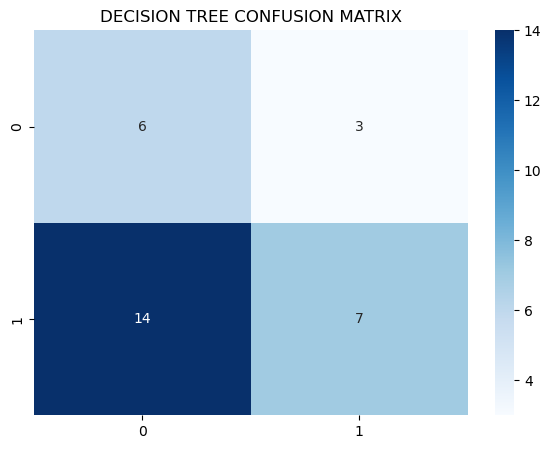

In [45]:
#CONFUSION MATRIX
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test , decision_tree_pred),annot=True , fmt='d',cmap='Blues')
plt.title('DECISION TREE CONFUSION MATRIX')
plt.show()